In [2]:
#standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

#JUPYTER notebook magics
%matplotlib inline 

In [29]:
# path of the directory where we are going to run the nextsimdg model:
dirwo = "/home/jovyan/work/"

In [28]:
%%bash
# now go to this work directory:
cd  $dirwo

In [31]:
%%bash
# link the precompiled executable of the nextsimdg model to the work directory
ln -sf /usr/local/bin/nextsim /home/jovyan/work/

# link the forcing files for atmospheric (ERA5) and ocean (TOPAZ)  boundary conditions to the work directory
ln -sf /data/model-forcings/25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc .
ln -sf /data/model-forcings/25km_NH.ERA5_2010-01-01_2011-01-01.nc .

# link the mesh file to the work directory
ln -sf ../nextsimdg/run/25km_NH.smesh 

# link the initial conditions  to the work directory
ln -sf ../nextsimdg/run/init_25km_NH.nc .

# list files in the work directory as a check:
ls

25km_NH.ERA5_2010-01-01_2011-01-01.nc
25km_NH.smesh
25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc
config_june23.cfg
init_25km_NH.nc
nextsim
Untitled.ipynb


* Write the config file (parameters for the simulation)
The cell below will create a text file named `config_myfirsttestcase.cfg`in the current directory and edit with the necessary parameters to run the model:

In [34]:
%%writefile ./config_myfirsttestcase.cfg

[model]
init_file = init_25km_NH.nc
start = 2010-01-01T00:00:00Z
stop = 2010-01-05T00:00:00Z
time_step = P0-0T00:15:00


[Modules]
Nextsim::IDiagnosticOutput = Nextsim::ConfigOutput
Nextsim::IDynamics = Nextsim::DummyDynamics
Nextsim::IIceThermodynamics = Nextsim::ThermoWinton
Nextsim::IAtmosphereBoundary = Nextsim::ERA5Atmosphere
Nextsim::IOceanBoundary = Nextsim::TOPAZOcean

[ConfigOutput]
period = P0-1T0:00:00
start = 2010-01-01T00:00:00Z
field_names = hsnow,hice,tice,cice
filename = 2010_nextsimdg-output.nc

[ERA5Atmosphere]
file = 25km_NH.ERA5_2010-01-01_2011-01-01.nc

[TOPAZOcean]
file = 25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc

Writing ./config_myfirsttestcase.cfg


* Re-open this text file without editing as a check

In [35]:
%%sh
cat ./config_myfirsttestcase.cfg


[model]
init_file = init_25km_NH.nc
start = 2010-01-01T00:00:00Z
stop = 2010-01-05T00:00:00Z
time_step = P0-0T00:15:00


[Modules]
Nextsim::IDiagnosticOutput = Nextsim::ConfigOutput
Nextsim::IDynamics = Nextsim::DummyDynamics
Nextsim::IIceThermodynamics = Nextsim::ThermoWinton
Nextsim::IAtmosphereBoundary = Nextsim::ERA5Atmosphere
Nextsim::IOceanBoundary = Nextsim::TOPAZOcean

[ConfigOutput]
period = P0-1T0:00:00
start = 2010-01-01T00:00:00Z
field_names = hsnow,hice,tice,cice
filename = 2010_nextsimdg-output.nc

[ERA5Atmosphere]
file = 25km_NH.ERA5_2010-01-01_2011-01-01.nc

[TOPAZOcean]
file = 25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc


* now you can run the simulation

In [36]:
%%sh
echo "NeXtSIM-DG is running !........"
./nextsim --config-file config_myfirsttestcase.cfg "$@"
ls -lrt

total 4892
lrwxrwxrwx 1 jovyan pr-sasip      22 Jun 21 04:25 nextsim -> /usr/local/bin/nextsim
lrwxrwxrwx 1 jovyan pr-sasip      60 Jun 21 04:25 25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc -> /data/model-forcings/25km_NH.TOPAZ4_2010-01-01_2011-01-01.nc
lrwxrwxrwx 1 jovyan pr-sasip      32 Jun 21 04:25 init_25km_NH.nc -> ../nextsimdg/run/init_25km_NH.nc
lrwxrwxrwx 1 jovyan pr-sasip      30 Jun 21 04:25 25km_NH.smesh -> ../nextsimdg/run/25km_NH.smesh
lrwxrwxrwx 1 jovyan pr-sasip      58 Jun 21 04:25 25km_NH.ERA5_2010-01-01_2011-01-01.nc -> /data/model-forcings/25km_NH.ERA5_2010-01-01_2011-01-01.nc
-rw-r--r-- 1 jovyan pr-sasip     642 Jun 21 04:27 config_june23.cfg
-rw-r--r-- 1 jovyan pr-sasip     642 Jun 21 04:34 config_myfirsttestcase.cfg
-rw-r--r-- 1 jovyan pr-sasip    6452 Jun 21 04:35 2023-06-21_SLX_runnextsimdg.ipynb
-rw-r--r-- 1 jovyan pr-sasip 1367291 Jun 21 04:38 restart.nc
-rw-r--r-- 1 jovyan pr-sasip     391 Jun 21 04:38 nextsim.04:35:57.log
-rw-r--r-- 1 jovyan pr-sasip 3615553 Jun

It should take about 4 minutes to execute for 5 days of simulation.

In [37]:
outputs= xr.open_dataset(dirwo+'/2010_nextsimdg-output.nc',group='data')
outputs

<xarray.Dataset>
Dimensions:  (time: 4, y: 121, x: 154, z: 3)
Coordinates:
  * time     (time) float64 1.262e+09 1.262e+09 1.263e+09 1.263e+09
Dimensions without coordinates: y, x, z
Data variables:
    cice     (time, y, x) float64 ...
    hice     (time, y, x) float64 ...
    hsnow    (time, y, x) float64 ...
    tice     (time, z, y, x) float64 ...

<function matplotlib.pyplot.show(close=None, block=None)>

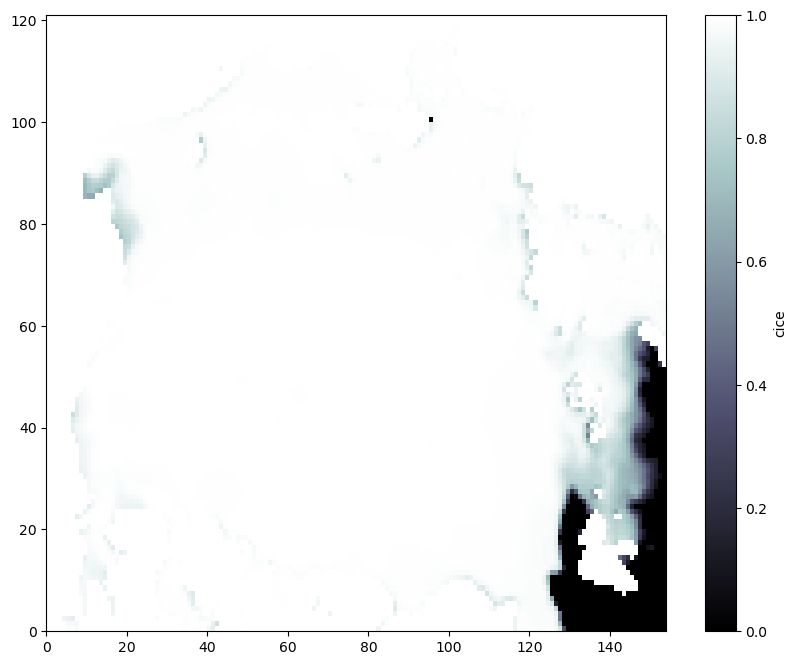

In [41]:
fig,(ax) = plt.subplots(1, 1, figsize=[10, 8],facecolor='w')
it=0
p = ax.pcolormesh(outputs.cice.isel(time=it),vmin=0,vmax=1,cmap="bone")
plt.colorbar(p,label='cice')
plt.show